# Shikha Singh

# The Sparks Foundation #GRIPAPR2021

# Task 1 - Predict the percentage of an student based on the no. of study hours.

## Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
%matplotlib inline

## Importing the data

In [53]:
try:
  vs = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')  
except :
  print("This file cant be read")

## Data Visualization 

In [47]:
vs.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
print(vs.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


## Plotting the data

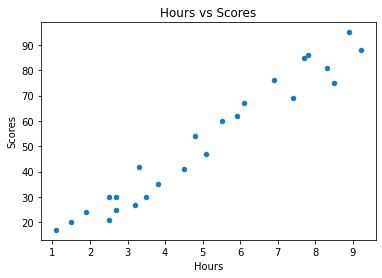

In [8]:
vs.plot(x='Hours' , y='Scores',kind='scatter')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### From the above graph, we see that there is a collinearity between scores and hours i.e. as hours increases ,scores also tend to increase positively.

## Preparing Data

In [21]:
#x [independent variable]
X=[]
for i in vs['Hours']:
  X.append([i])
print(X)


[[2.5], [5.1], [3.2], [8.5], [3.5], [1.5], [9.2], [5.5], [8.3], [2.7], [7.7], [5.9], [4.5], [3.3], [1.1], [8.9], [2.5], [1.9], [6.1], [7.4], [2.7], [4.8], [3.8], [6.9], [7.8]]


In [22]:
#y [dependent variable]
y=[]
for i in vs['Scores']:
  y.append([i])
print(y)

[[21], [47], [27], [75], [30], [20], [88], [60], [81], [25], [85], [62], [41], [42], [17], [95], [30], [24], [67], [69], [30], [54], [35], [76], [86]]


## Splitting data into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)
print(X_train)


[[6.9], [1.1], [5.1], [7.7], [3.3], [8.3], [9.2], [6.1], [3.5], [2.7], [5.5], [2.7], [8.5], [2.5], [4.8], [8.9], [4.5]]


## Training Algorithm  
Now we have training set data to train our model

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


## Plotting the regression line

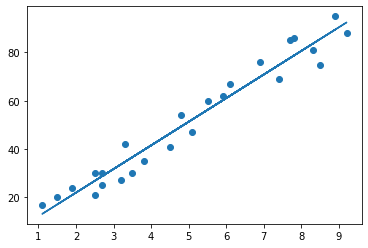

In [33]:
line = regressor.coef_*X+regressor.intercept_  # bf_line = m(x) +c
plt.scatter(X, y)
plt.plot(X, line)
plt.show()


## Predictions 
by providing x_test to our algorithm we retrieve y_pred and we compare it to the actual corressponding value of y_test

In [35]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5], [3.2], [7.4], [2.5], [5.9], [3.8], [1.9], [7.8]]


## Comparing   
y_test and y_pred values

In [34]:
Y_test=[]
Y_pred=[]
for i in y_test:
  Y_test.append(sum(i))
for i in y_pred:
  Y_pred.append(sum(i))
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
print(df2 )


   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


## Provided prediction testcase
Predict the percentage of an student based on the no. of study hours.

In [36]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0][0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


## Evaluating Model

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 


Mean Absolute Error: 4.419727808027652
